In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("assignment.csv")

# Display the first 5 rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check again for missing values in TotalCharges after conversion
print("Missing values after converting TotalCharges to numeric:")
print(df['TotalCharges'].isnull().sum())


Missing values after converting TotalCharges to numeric:
11


In [6]:
# Impute missing TotalCharges values with the median and assign back to the column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Verify no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label Encoding for binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # 0 and 1 encoding for binary categories



# Display the resulting DataFrame to verify the changes
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Define the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Apply OneHotEncoder to non-binary categorical columns
non_binary_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Fit and transform the data
ohe_transform = ohe.fit_transform(df[non_binary_cols])

# Convert the transformed data to a DataFrame with appropriate column names
ohe_df = pd.DataFrame(ohe_transform, columns=ohe.get_feature_names_out(non_binary_cols))

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
# Keep 'TotalCharges' and other non-categorical columns
df = pd.concat([df.drop(columns=non_binary_cols), ohe_df], axis=1)
#df=pd.concat([df, ohe_df], axis=1).drop(columns=non_binary_cols)
# Verify the DataFrame after encoding
pd.set_option('display.max_columns', None)

print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0             0                 1           29.85         29.85      0   
1             1                 0           56.95       1889.50      0   
2             1                 1           53.85        108.15      1   
3             0                 0           42.30       1840.75      0   
4             1                 1           70.70        151.65      1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1                           

In [10]:
print(df.dtypes)

customerID                                object
gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                     int64
PhoneService                               int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
MultipleLines_No phone service           float64
MultipleLines_Yes                        float64
InternetService_Fiber optic              float64
InternetService_No                       float64
OnlineSecurity_No internet service       float64
OnlineSecurity_Yes                       float64
OnlineBackup_No internet service         float64
OnlineBackup_Yes                         float64
DeviceProtection_No internet service     float64
DeviceProtection_Yes

In [14]:
from sklearn.preprocessing import StandardScaler

# Define the StandardScaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on your dataset

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify the DataFrame after scaling
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0 -1.277445   
1  5575-GNVDE       1              0        0           0  0.066327   
2  3668-QPYBK       1              0        0           0 -1.236724   
3  7795-CFOCW       1              0        0           0  0.514251   
4  9237-HQITU       0              0        0           0 -1.236724   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0             0                 1       -1.160323     -0.994242      0   
1             1                 0       -0.259629     -0.173244      0   
2             1                 1       -0.362660     -0.959674      1   
3             0                 0       -0.746535     -0.194766      0   
4             1                 1        0.197365     -0.940470      1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1               

In [20]:
# Create the 'AverageTransactionValue' feature
df['AverageTransactionValue'] = df['TotalCharges'] / df['tenure']

In [23]:
df['AverageTransactionValue'] 

0       0.778305
1      -2.611953
2       0.775981
3      -0.378737
4       0.760452
          ...   
7038    0.377423
7039    1.390066
7040    0.981877
7041    0.754847
7042    1.470950
Name: AverageTransactionValue, Length: 7043, dtype: float64

In [25]:
# Assuming you have binary features for different types of customer service interactions
# e.g., 'TechSupport', 'OnlineSecurity', etc.

# Create the 'CustomerServiceInteractions' feature
interaction_features = ['TechSupport_Yes', 'OnlineSecurity_Yes', 'DeviceProtection_Yes']
df['CustomerServiceInteractions'] = df[interaction_features].sum(axis=1)


In [27]:
df['CustomerServiceInteractions']

0       0.0
1       2.0
2       1.0
3       3.0
4       0.0
       ... 
7038    3.0
7039    1.0
7040    1.0
7041    0.0
7042    3.0
Name: CustomerServiceInteractions, Length: 7043, dtype: float64

## EDA

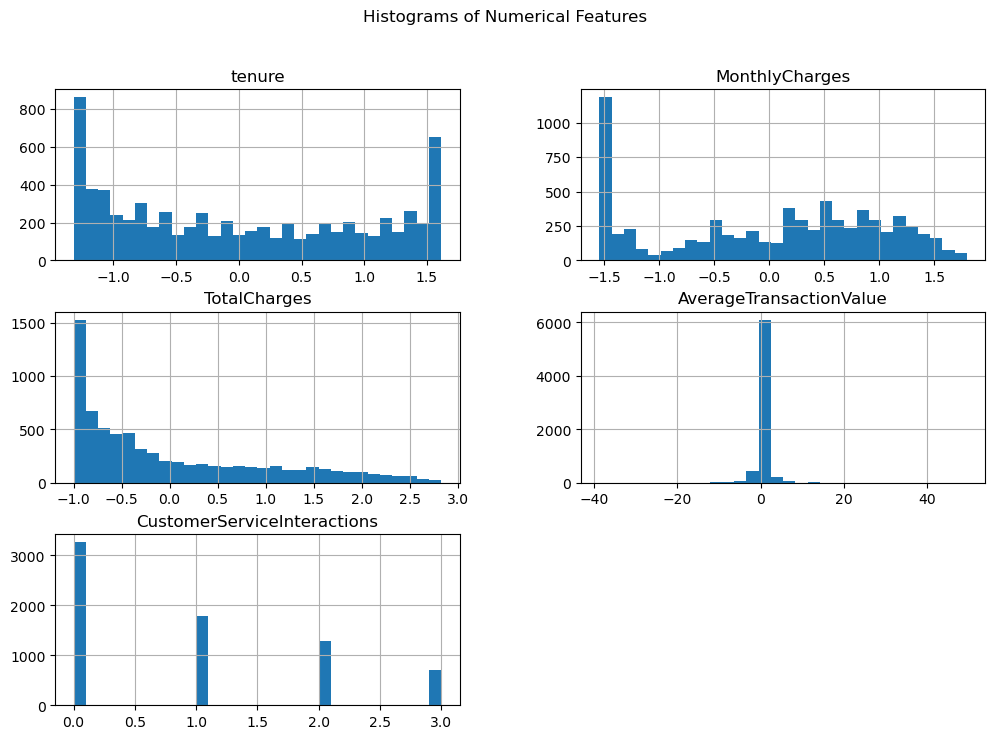

In [30]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AverageTransactionValue', 'CustomerServiceInteractions']
df[numerical_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


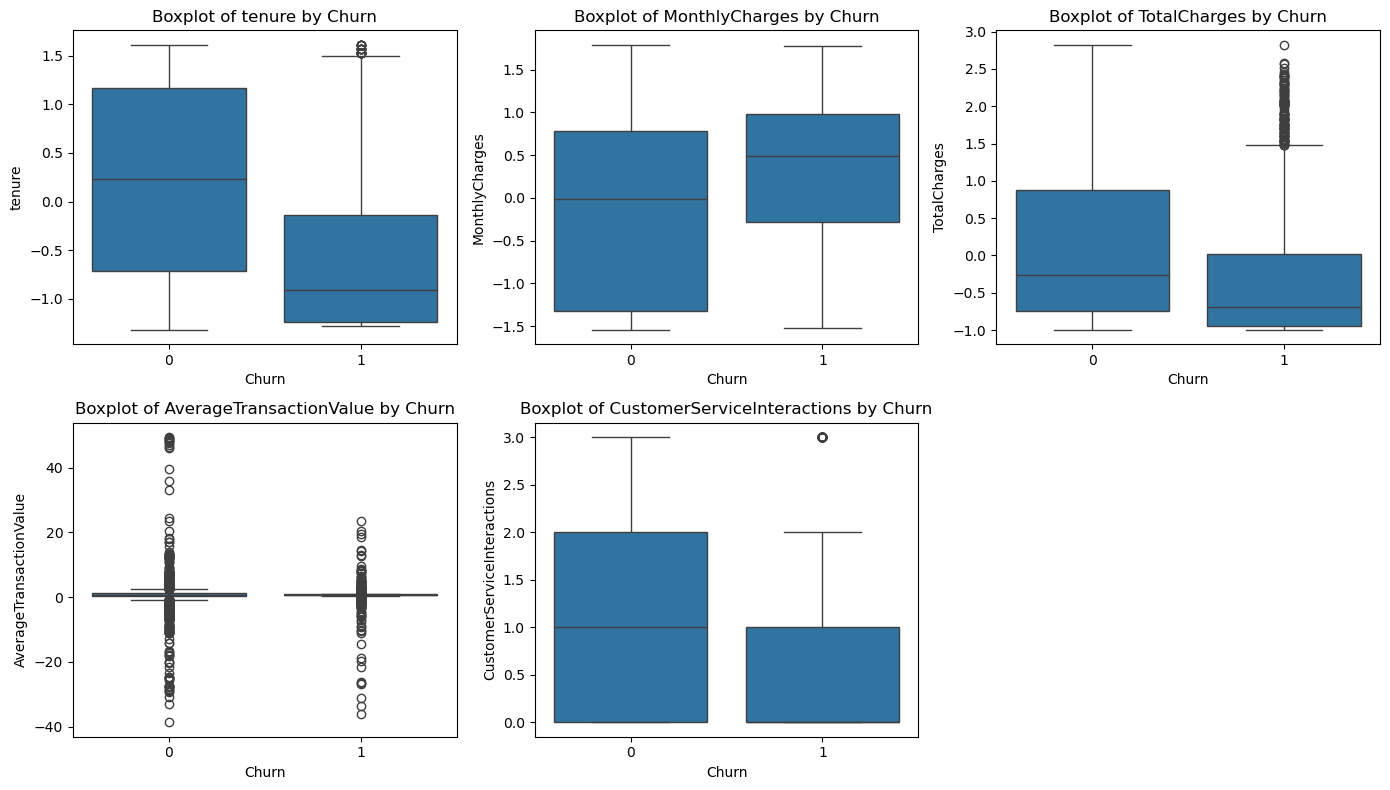

In [31]:
import seaborn as sns

# Boxplot for numerical features with respect to churn
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')
plt.tight_layout()
plt.show()


In [33]:
df.drop(columns=['customerID'], inplace=True)


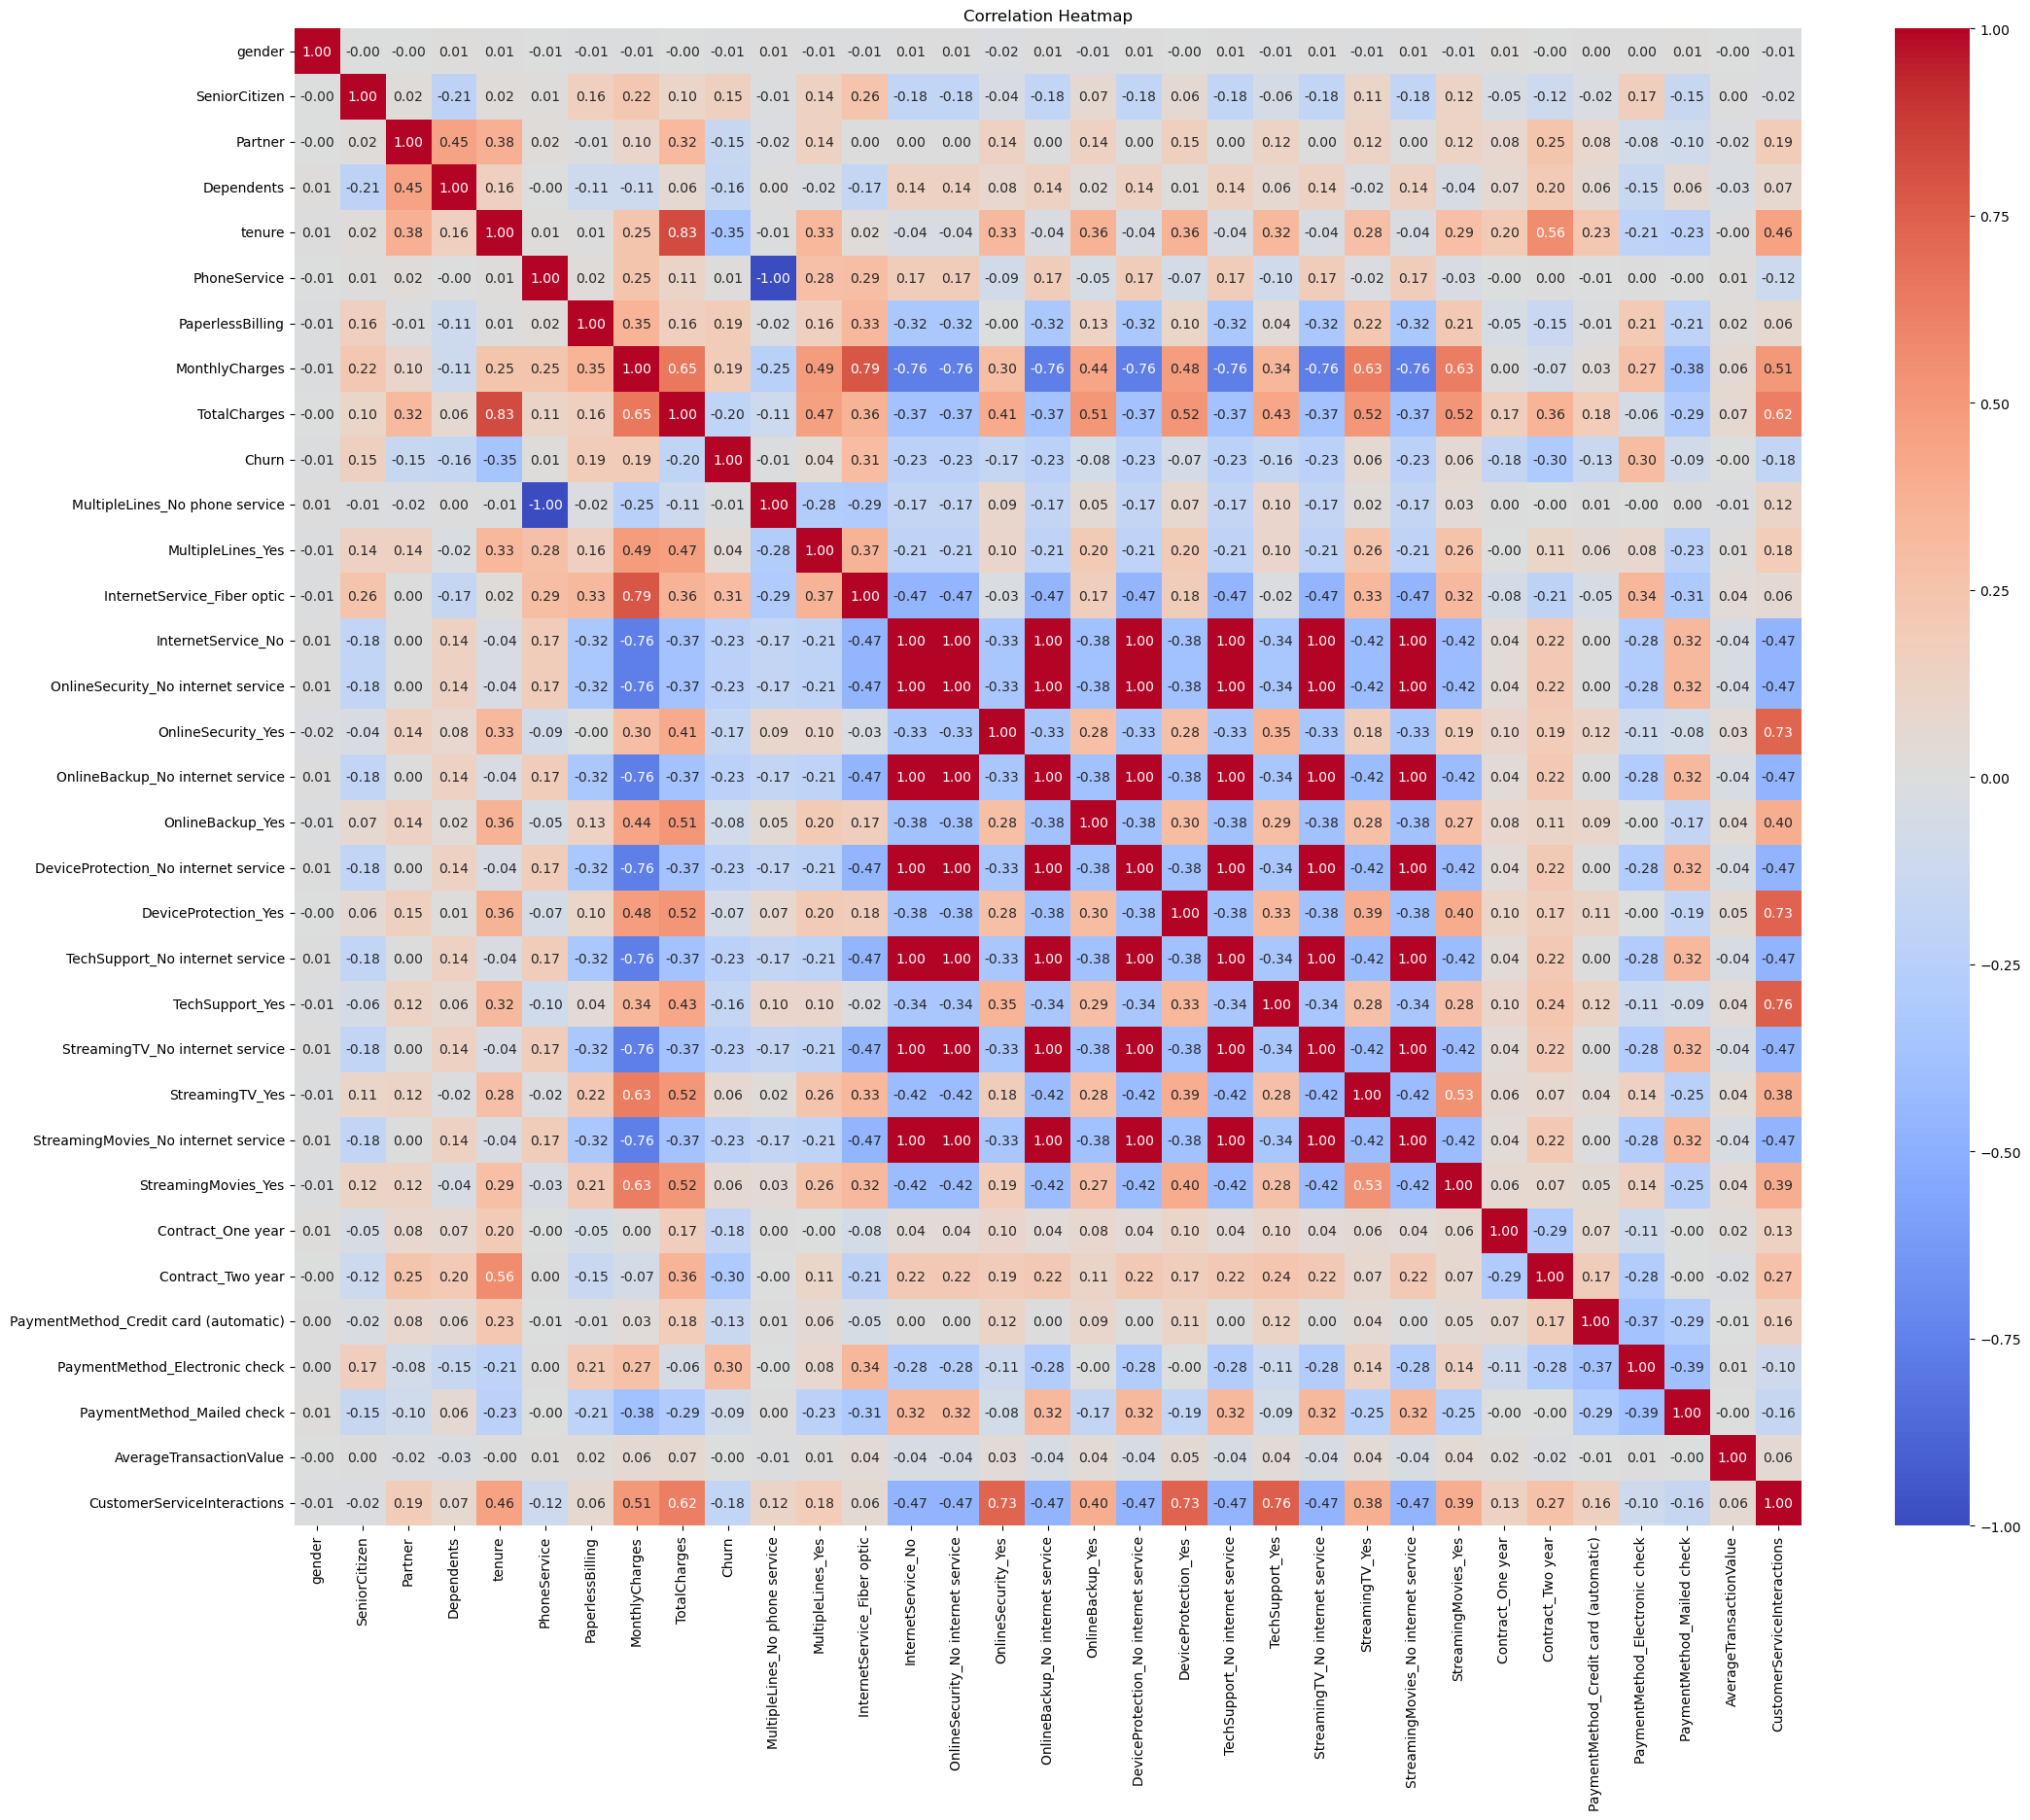

In [36]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Customer Segmentation

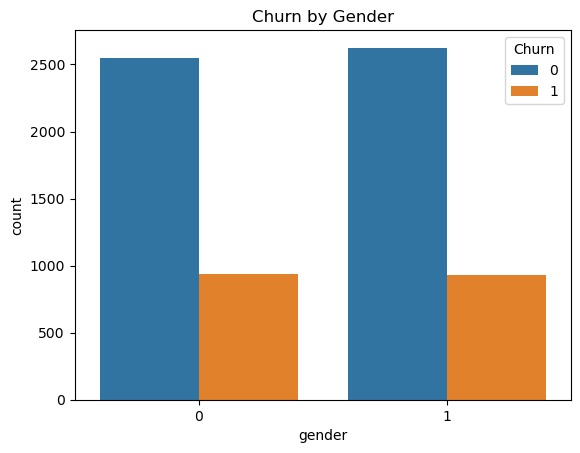

In [41]:
# Countplot of Churn by Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


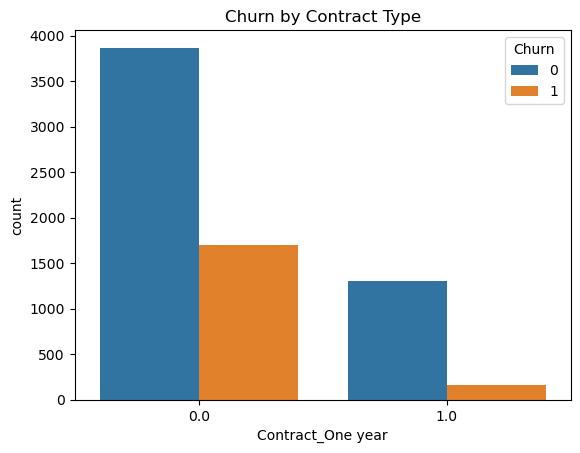

In [47]:
# Countplot of Churn by Contract type
sns.countplot(x='Contract_One year', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


## Question 4: Model Development

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [54]:
# Load the dataset
file_path = "assignment.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
from sklearn.model_selection import train_test_split

# Drop 'customerID' and 'Churn' to create feature set (X)
X = df.drop(['customerID', 'Churn'], axis=1)

# 'Churn' is the target variable
y = df['Churn']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 19) (1409, 19) (5634,) (1409,)


## Develop and Compare Different Machine Learning Models

### Handling Categorical Variables

In [65]:
import pandas as pd

# Drop 'customerID' and 'Churn' to create feature set (X)
X = df.drop(['customerID', 'Churn'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 'Churn' is the target variable
y = df['Churn']

# Split the data: 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 6559) (1409, 6559) (5634,) (1409,)


### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")


Logistic Regression Accuracy: 0.8240


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Accuracy: 0.7977


### Gradient Boosting Machine (GBM)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

print(f"GBM Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")


GBM Accuracy: 0.8162


### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

# Predict using the Neural Network model
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)
nn_auc = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"Neural Network Precision: {nn_precision:.4f}")
print(f"Neural Network Recall: {nn_recall:.4f}")
print(f"Neural Network F1-Score: {nn_f1:.4f}")
print(f"Neural Network AUC: {nn_auc:.4f}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression metrics
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression F1-Score: {f1_score(y_test, y_pred_log):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]):.4f}")

# Random Forest metrics
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")

# Gradient Boosting metrics
print(f"GBM Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"GBM Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"GBM F1-Score: {f1_score(y_test, y_pred_gbm):.4f}")
print(f"GBM AUC: {roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1]):.4f}")

# Neural Network metrics
nn_pred_prob = nn_model.predict_proba(X_test)[:, 1]
nn_pred = (nn_pred_prob > 0.5).astype("int32")
print(f"Neural Network Precision: {precision_score(y_test, nn_pred):.4f}")
print(f"Neural Network Recall: {recall_score(y_test, nn_pred):.4f}")
print(f"Neural Network F1-Score: {f1_score(y_test, nn_pred):.4f}")
print(f"Neural Network AUC: {roc_auc_score(y_test, nn_pred_prob):.4f}")


## Question 5

### Interpretability and Feature Importance

In [ ]:
pip install shap
